In [ ]:
!pip install yfinance
import yfinance as yf

import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import coint   
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
from functools import cmp_to_key

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Downloading the dataset from Yahoo Finance
We will be downloading the data of NIFTY-50 stocks from Yahoo Finance from 2015 to 2022 to find the best pairs of stocks to invest in.

In [ ]:
stocks=['APOLLOHOSP.NS','ONGC.NS','RELIANCE.NS','CIPLA.NS','WIPRO.NS','TATACONSUM.NS','INDUSINDBK.NS','BHARTIARTL.NS','TCS.NS','TATASTEEL.NS','KOTAKBANK.NS','BAJFINANCE.NS','LT.NS','ICICIBANK.NS','NESTLEIND.NS','BAJAJ-AUTO.NS','MARUTI.NS','TITAN.NS','BRITANNIA.NS','ULTRACEMCO.NS','HEROMOTOCO.NS','NTPC.NS','BAJAJFINSV.NS','ITC.NS','TECHM.NS','COALINDIA.NS','HINDALCO.NS','M&M.NS']
start = datetime.datetime(2015,1,1)#starting date
end = datetime.datetime(2021,1,1)#closing date
data = yf.download(stocks, start, end)['Adj Close']
data.tail()

[*********************100%***********************]  28 of 28 completed


,APOLLOHOSP.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,HEROMOTOCO.NS,HINDALCO.NS,...,NTPC.NS,ONGC.NS,RELIANCE.NS,TATACONSUM.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-24,2404.997803,3143.864990,898.713257,5157.755371,515.010864,3432.274170,824.622375,116.054993,2917.231689,233.183228,...,87.624924,84.043610,1981.788940,592.762207,27.056681,2838.744873,884.903198,1487.059204,4991.597656,377.579468
2020-12-28,2380.828857,3181.081787,898.963135,5176.854980,519.291809,3418.329590,821.603821,117.247475,2926.250244,236.086334,...,88.063271,84.630058,1990.882202,594.192444,27.506683,2858.308350,884.763062,1534.427612,5087.971191,378.270966
2020-12-29,2368.569824,3196.779053,897.064270,5173.273926,517.947815,3408.606689,819.426392,115.075455,2918.086182,231.854706,...,86.441399,84.043610,1977.714355,590.395142,27.487120,2859.381592,902.092163,1530.998047,5092.522461,380.345581
2020-12-30,2388.353760,3212.243164,895.630127,5306.224121,513.866028,3399.689697,815.319153,115.501350,2944.096191,233.626068,...,86.879745,84.133827,1983.130493,586.203369,27.845816,2838.696045,918.533691,1543.424194,5298.331543,379.752838
2020-12-31,2404.748779,3208.424072,890.098511,5267.478027,507.444550,3392.527832,811.508789,115.373566,2952.260254,236.726013,...,87.098915,83.953384,1972.993896,581.814453,27.984947,2793.276123,909.145203,1557.888062,5232.432617,381.580505


# Choosing the Pairs
We will find out pairs of stocks with p-value less than threshold value. If the p-value is less than the threshold value, we consider the pair of stocks to be co-integrable

In [ ]:
def findCointegrationValue(data,threshold=0.05):
    n = data.shape[1]
    p_values_matrix = np.ones((n,n));
    keys = data.keys();
    pairs = []
    for i in range(n):
      for j in range(i+1,n):
        S1 = data[keys[i]]
        S2 = data[keys[j]]
        ans = coint(S1,S2) #function to cointegrate the stocks
        pvalue = ans[1]
        p_values_matrix[i,j] = pvalue
        if(pvalue < threshold):
          pairs.append(((i,j),pvalue)) #It follows Alternate hypothesis, hence the stocks are cointegrated  
        
    return pairs 

In [ ]:
def compare(x,y):
  return x[1]-y[1]

def get_Best_K_Pairs(data,k=10):
    pairs = findCointegrationValue(data)
    pairs=sorted(pairs,key=cmp_to_key(compare))
    if len(pairs) < k:
      return pairs
    return pairs[0:k]


In [ ]:
coint_pairs = get_Best_K_Pairs(data,5)
coint_pairs

[((3, 13), 0.0002666391233213645),
 ((1, 26), 0.0006787530524519815),
 ((12, 18), 0.0017134704406537606),
 ((13, 25), 0.0027951869196845987),
 ((11, 18), 0.0028071058668206464)]

In [ ]:
keys  = data.keys()
stock1 = keys[coint_pairs[0][0][0]]
stock2 = keys[coint_pairs[0][0][1]]
print("Pair having the highest cointegration value is "+stock1+" and "+stock2+"\n")
print("Other good pair of stocks are :")
for i in range(1,len(coint_pairs)):
  stock1 = keys[coint_pairs[i][0][0]]
  stock2 = keys[coint_pairs[i][0][1]]
  print(stock1+" and "+stock2)

Pair having the highest cointegration value is BAJFINANCE.NS and KOTAKBANK.NS

Other good pair of stocks are :
BAJAJ-AUTO.NS and ULTRACEMCO.NS
ITC.NS and NTPC.NS
KOTAKBANK.NS and TITAN.NS
INDUSINDBK.NS and NTPC.NS


The best pair of stocks we found is Bajaj Finance and Kotak Bank

**CALCULATING THE SPREAD**

Here we are calculating the spread of two most correlated stocks in our dataset

In [ ]:
def normalize(series): 
    newSeries = series.copy()
    for i in range(len(newSeries)):
        x = (newSeries[i] - newSeries[:i+1].mean()) / np.std(newSeries[:i+1])
        series[i]= x
    return series

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.



Graph of ratio of BAJFINANCE.NS and KOTAKBANK.NS
red is the mean line


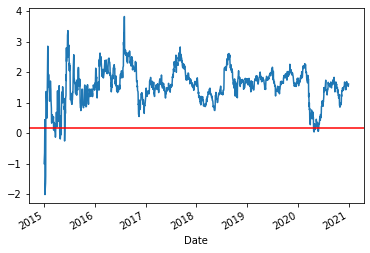

In [ ]:
stock1= "BAJFINANCE.NS"
stock2= "KOTAKBANK.NS"
ratio = data[stock1]/data[stock2]
normalize(ratio).plot()
plt.axhline(normalize(ratio).mean(),color="red")
print("\nGraph of ratio of "+stock1+" and "+stock2)
print("red is the mean line")
plt.show()

Ploting them over the timeline

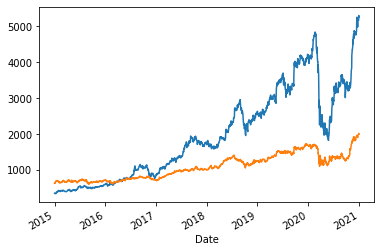

In [ ]:
data[stock1].plot()
data[stock2].plot()

We need to find out what features are actually important in determining the direction of the ratio moves. Knowing that the ratios always eventually revert back to the mean, maybe the moving averages and metrics related to the mean will be important.

Let's try using these features:

* 60 day Moving Average of Ratio
* 7 day Moving Average of Ratio
* 60 day Standard Deviation
* normalised score

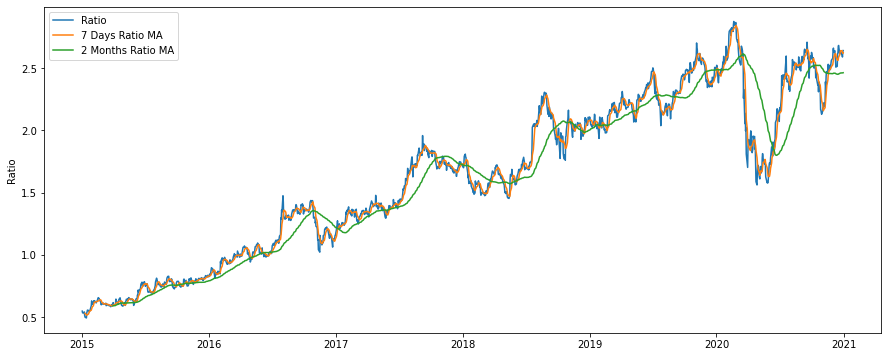

In [ ]:
stock1= "BAJFINANCE.NS"
stock2= "KOTAKBANK.NS"
ratios = data[stock1]/data[stock2]
ratios_mavg_7d = ratios.rolling(window=7, center=False).mean()
ratios_mavg_2m = ratios.rolling(window=60, center=False).mean()
std_2m = ratios.rolling(window=60, center=False).std()
norm_score = (ratios_mavg_7d - ratios_mavg_2m)/std_2m
plt.figure(figsize=(15, 6))
plt.plot(ratios.index, ratios.values)
plt.plot(ratios_mavg_7d.index, ratios_mavg_7d.values)
plt.plot(ratios_mavg_2m.index, ratios_mavg_2m.values)
plt.legend(['Ratio', '7 Days Ratio MA', '2 Months Ratio MA'])

plt.ylabel('Ratio')
plt.show()

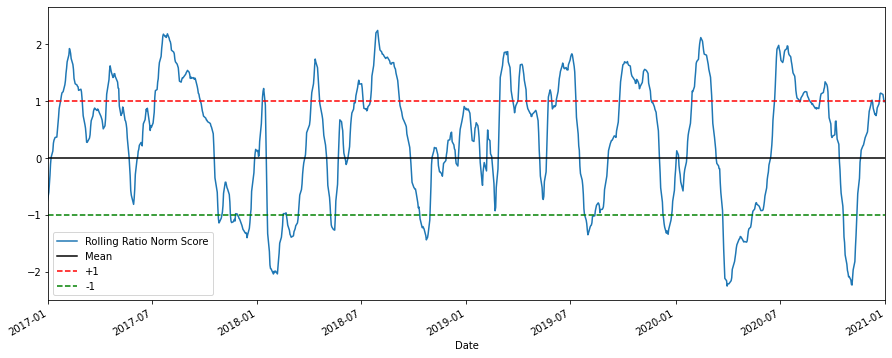

In [ ]:
plt.figure(figsize=(15,6))
norm_score.plot()
plt.xlim('2017', '2021')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio Norm Score', 'Mean', '+1', '-1'])
plt.show()

**Creating a Strategy**


A standard normal distribution has a mean of 0 and a standard deviation 1. Looking at the plot, it's pretty clear that if the time series moves 1 standard deviation beyond the mean, it tends to revert back towards the mean. Using these models, we can create the following trading signals:
*   Buy(1) whenever the norm_score is below -1, meaning we expect the ratio to increase.

*   Sell(-1) whenever the norm_score is above 1, meaning we expect the ratio to decrease.


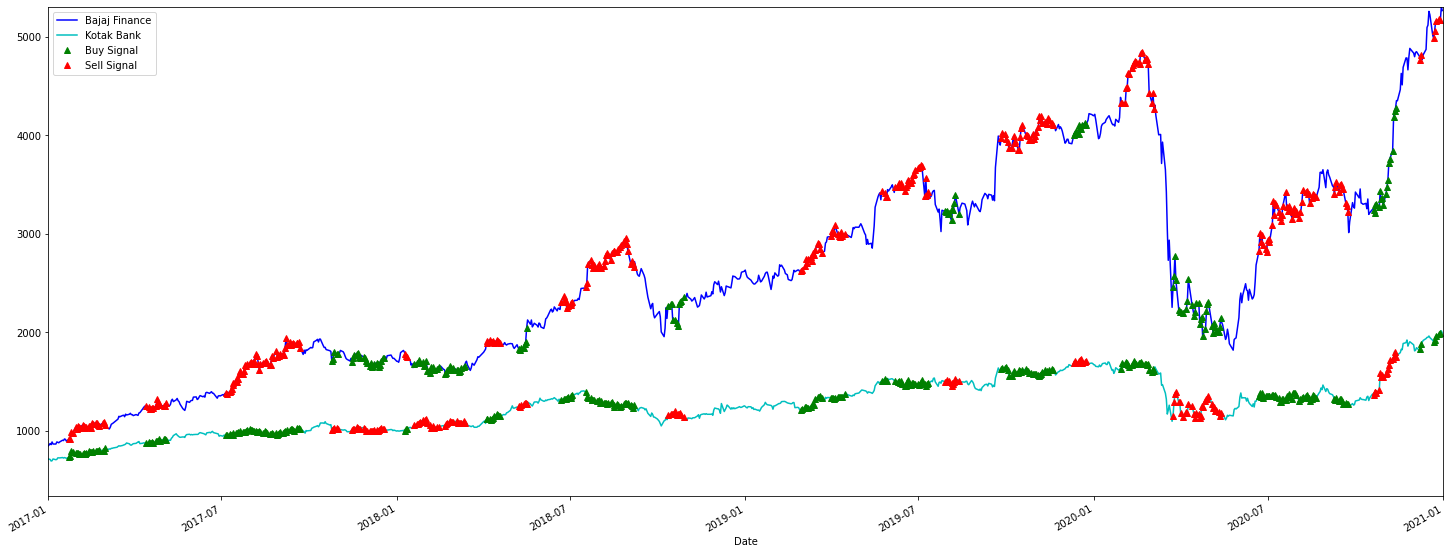

In [ ]:
plt.figure(figsize=(25,10))
stock1 = data["BAJFINANCE.NS"]
stock2 = data["KOTAKBANK.NS"]

buy = ratios.copy()
sell = ratios.copy()
buy[norm_score>-1] = 0
sell[norm_score<1] = 0

stock1[90:].plot(color='b')
stock2[90:].plot(color='c')
buyR = 0*stock1.copy()
sellR = 0*stock1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = stock1[buy!=0]
sellR[buy!=0] = stock2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = stock2[sell!=0]
sellR[sell!=0] = stock1[sell!=0]

buyR[90:].plot(color='g', linestyle='None', marker='^')
sellR[90:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(stock1.min(), stock2.min()), max(stock1.max(), stock2.max())))
plt.xlim('2017', '2021')

plt.legend(['Bajaj Finance', 'Kotak Bank', 'Buy Signal', 'Sell Signal'])
plt.show()

**Trading Strategy**

For the cointegration approach, we will use the moving averages to calculate the transactions to be done.
First of all we calculate the moving average on window size of window1 (or short window) and window2 (long window) and the moving standard deviation for window size of window2 for the ratio(Y/X) of stocks.

Now, when **moving_average_window1 > moving_average_window2 + c1 * standard_deviation_window2**, we short the stock Y and go for long on stock X

We would square off when  **moving_average_window1 < moving_average_window2 - c2 * standard_deviation_window2**

In [ ]:
def trade(stock1, stock2, window1=7, window2=60,MAX_AMOUNT=10000, MAX_TRANSACTION=5,c1=0.9,c2=0.8):
    #Computing the ratio over time
    ratios = stock1/stock2 
    # Compute rolling mean and rolling standard deviation
    ma1 = ratios.rolling(window=window1,center=False).mean()
    ma2 = ratios.rolling(window=window2,center=False).mean()
    std2 = ratios.rolling(window=window2,center=False).std()
    
    #initialising the money,number of transactions,number of stock1, stock2
    money=0
    stock1_count = 0
    stock2_count = 0
    trans = 0
    amount = MAX_AMOUNT/MAX_TRANSACTION
    for i in range(window2-1,len(ratios)):
        if ma1[i] < (ma2[i] - c1*std2[i]) and trans <= MAX_TRANSACTION :  
            trans +=1
            stock1_count += amount/stock1[i] 
            stock2_count -= amount/stock2[i]
        elif ma1[i] > (ma2[i]+c1*std2[i]) and trans <= MAX_TRANSACTION :
            trans +=1
            stock1_count -= amount/stock1[i] 
            stock2_count += amount/stock2[i]
        elif ma1[i] <= ma2[i]+c2*std2[i] and ma1[i] >= ma2[i]-c2*std2[i]:
            money += stock1[i] * stock1_count + stock2[i] * stock2_count
            stock1_count = 0
            stock2_count = 0
            trans = 0

    #Squaring off all transactions
    money += stock1[len(ratios)-1] * stock1_count + stock2[len(ratios)-1] * stock2_count

    return money

# Demo Trading Results

In [ ]:
coint_stocks = ['BAJFINANCE.NS', 'KOTAKBANK.NS']
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,11,1)
recent_data = yf.download(coint_stocks, start, end)['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [ ]:
print("Net gain for Bajaj Finance and Kotak Bank:",trade(recent_data['BAJFINANCE.NS'],recent_data['KOTAKBANK.NS']))
print("Return:",trade(recent_data['BAJFINANCE.NS'],recent_data['KOTAKBANK.NS'])/10000*100,"%\n")

Net gain for Bajaj Finance and Kotak Bank: 4706.739666894927
Return: 47.06739666894927 %



Let's try using the same strategy for some random pairs of stocks



In [ ]:
random_stocks = ['CIPLA.NS','WIPRO.NS','TATACONSUM.NS','TCS.NS']
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,11,1)
recent_data = yf.download(random_stocks, start, end)['Adj Close']
print("\nNet gain for Cipla and Wipro:",trade(recent_data['CIPLA.NS'],recent_data['WIPRO.NS']))
print("Return:",trade(recent_data['CIPLA.NS'],recent_data['WIPRO.NS'])/10000*100,"%\n")
print("Net gain for Tata Consumer and TCS:",trade(recent_data['TATACONSUM.NS'],recent_data['TCS.NS']))
print("Return:",trade(recent_data['TATACONSUM.NS'],recent_data['TCS.NS'])/10000*100,"%\n")

[*********************100%***********************]  4 of 4 completed

Net gain for Cipla and Wipro: -3683.369598728352
Return: -36.83369598728351 %

Net gain for Tata Consumer and TCS: 1601.8932179995145
Return: 16.018932179995147 %



We can see that the strategy works well if the stocks are co-integrable otherwise it may not work well.